In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
ra = pd.read_csv(r"C:\Mini-Project\RA.csv")
ra = ra.drop(ra.index[[1]], axis=0)
ra.head(83)

,Sr_No,Seat Number.,NAME,HMI,Unnamed: 4,DC,Unnamed: 6,HPC/NLP,Unnamed: 8,Institute Level -PM/EM,...,Unnamed: 12,DCL,Unnamed: 14,CCL,Unnamed: 16,Computational Lab-II,Unnamed: 18,Major Project-II,Unnamed: 20,CGPI
0,NaN,NaN,NaN,TH,IA,TH,IA,TH,IA,TH,...,Oral/Prac,TW,Oral/Prac,TW,Oral/Prac,TW,Oral/Prac,TERMWORK,ORAL,NaN
2,1.0,7282305,CHAWARA RUTUJA SURESH,67,16,59,16,57,12,44,...,21,22,20,45,20,44,22,43,44,8.92
3,2.0,7282306,CHORMARE RAHUL JALINDAR,55,16,53,17,63,15,48,...,22,19,19,46,21,43,21,47,46,8.85
4,3.0,7282307,CHOWKEKAR SAHIL DEEPAK,65,17,64,17,62,14,65,...,22,22,21,46,22,44,23,43,42,9.85
5,4.0,7282308,DABHOLKAR SIDDHI NARESH,64,18,66,19,76,16,59,...,22,22,22,46,22,45,23,47,47,9.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,78.0,7282383,RAUL YASH CHAKOR,52,13,45,13,63,15,52,...,21,20,20,46,22,40,19,45,45,8.38
80,79.0,7282384,KORE MRUNMAI SHEKHAR,56,15,50,18,52,17,53,...,22,21,21,48,22,44,20,43,42,8.31
81,80.0,7282385,SAH NEHA RANJEET,49,16,57,16,48,15,56,...,22,20,21,46,22,45,20,45,45,8.42
82,81.0,7282386,SAWANT PRANJALI VILAS,61,17,62,16,62,14,54,...,22,21,19,46,22,40,18,45,45,9.15


### Passing %

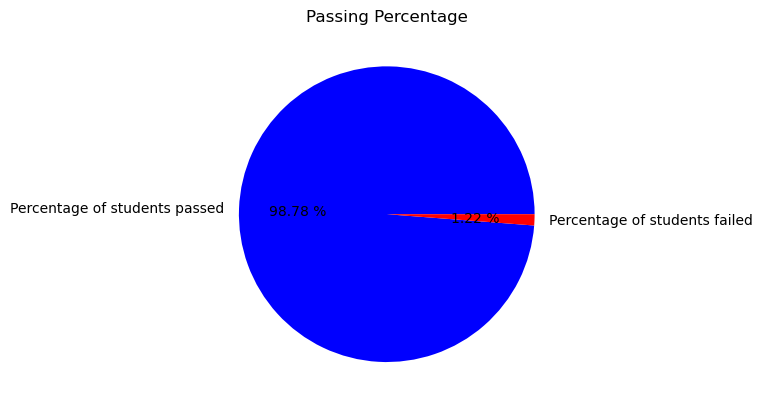

In [3]:
ra = pd.read_csv(r"C:\Mini-Project\RA.csv")
ra = ra.drop(ra.index[[1]], axis=0)

StudentsPassed = 0
noOfStudents = 0

start_index = 1  # Replace with your starting index
end_index = 83    # Replace with your ending index

selected_cgpi = ra.loc[start_index:end_index, "CGPI"].tolist()
selected_sr_num = ra.loc[start_index:end_index, "Sr_No"].tolist()

for cgpi in selected_cgpi:
    if cgpi != 'F':
        StudentsPassed+=1
    
for sr_no in selected_sr_num:
    noOfStudents+=1

PassedPercent = (StudentsPassed/noOfStudents) *100
FailedPercent = 100 - PassedPercent
labels = ['Percentage of students passed', 'Percentage of students failed']
colors = ['blue', 'red']
plt.pie([PassedPercent, FailedPercent], labels = labels, colors=colors, autopct='%.2f %%') # autopct displays the inside of the pie chart
plt.title('Passing Percentage')
plt.show()

### Failed student List

In [4]:
start_index = 1  # Replace with your starting index
end_index = 83    # Replace with your ending index

selected_cgpi = ra.loc[start_index:end_index, "CGPI"].tolist()
selected_sr_num = ra.loc[start_index:end_index, "Sr_No"].tolist()

# Filter the DataFrame to get students with CGPA equal to 'F'
failed_cgpa = ra[ra['CGPI'] == 'F']

# from failed_cgpa we are linking the particular cgpa student with their names and serial numbers
FailedStudent_names = failed_cgpa['NAME'].tolist()
FailedStudent_srnum = failed_cgpa['Sr_No'].tolist()
Failed_cgpa = failed_cgpa['CGPI'].tolist()



# total number of subjects 
subjects = ['HMI', 'DC', 'HPC/NLP', 'Institute Level -PM/EM', 'HMIL', 'DCL', 'CCL', 'Computational Lab-II', 'Major Project-II']

# Initialize an empty list to store the subjects in which students have failed.
failed_subjects = []

# Loop through each student's record.
for index, row in failed_cgpa.iterrows():
    # Initialize an empty list for the subjects of this student.
    student_failed_subjects = []
    for subject in subjects:
        # Check if the student is absent.
        if row[subject] == 'AB':
            student_failed_subjects.append(subject)
    
    # Join the failed subjects into a comma-separated string.
    failed_subjects.append(', '.join(student_failed_subjects))



# We are using dict to display the collected information in columns 
Failed_Table = {'Sr. No.': [int(item) for item in FailedStudent_srnum],
                'Name of Student': [str(item) for item in FailedStudent_names], 
                'Subject Failed' : [str(item) for item in failed_subjects],                
                'CGPA': [str(item) for item in Failed_cgpa]
                }

# Converting the information to tabular format
Failed = pd.DataFrame(Failed_Table)
Failed

,Sr. No.,Name of Student,Subject Failed,CGPA
0,17,KHARPADE UMESH SUKRYA,Institute Level -PM/EM,F


### Slow, Avg and Adv Learners Table

In [5]:
# storing the names of all students 
start_index = 1
end_index = 83
selected_sr_num = ra.loc[start_index:end_index, "Sr_No"].tolist()
selected_names = ra.loc[start_index:end_index, "NAME"].tolist()
cgpi_list = [str(item) for item in selected_cgpi]

LearnersTable = {'Sr. No.': [int(item) for item in selected_sr_num],
                 'Name of Student': [str(item) for item in selected_names],
                 'CGPA' : [str(item) for item in cgpi_list], 
                 'Type of Learner': ["Slow Learner" if item < '6' else
                                     "Average Learner" if '6' <= item < '8' else 
                                     "Advanced Learner" for item in cgpi_list]}

RA = pd.DataFrame(LearnersTable)
RA

,Sr. No.,Name of Student,CGPA,Type of Learner
0,1,CHAWARA RUTUJA SURESH,8.92,Advanced Learner
1,2,CHORMARE RAHUL JALINDAR,8.85,Advanced Learner
2,3,CHOWKEKAR SAHIL DEEPAK,9.85,Advanced Learner
3,4,DABHOLKAR SIDDHI NARESH,9.88,Advanced Learner
4,5,DESHMUKH PRANJALI KIRAN,9.04,Advanced Learner
...,...,...,...,...
77,78,RAUL YASH CHAKOR,8.38,Advanced Learner
78,79,KORE MRUNMAI SHEKHAR,8.31,Advanced Learner
79,80,SAH NEHA RANJEET,8.42,Advanced Learner
80,81,SAWANT PRANJALI VILAS,9.15,Advanced Learner


### Slow, Avg and Adv Learners Graph

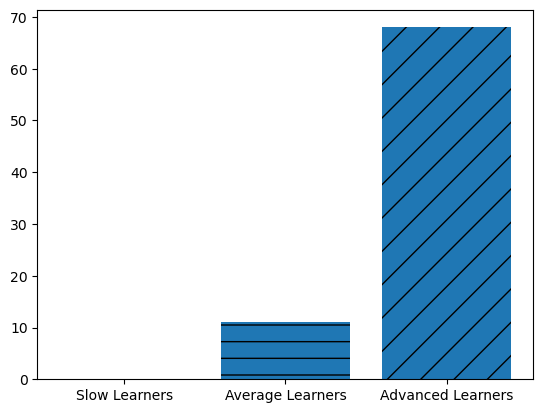

<Figure size 300x200 with 0 Axes>

In [6]:
selected_cgpi.pop(16)
cgpi_list = [float(item) for item in selected_cgpi]

slowLearners = 0
avgLearners = 0
advLearners = 0

for item in cgpi_list:
    if item < 6:
        slowLearners+=1
    elif item > 6 and item < 8:
        avgLearners+=1
    elif item > 8:
        advLearners+=1

labels = ['Slow Learners', 'Average Learners', 'Advanced Learners']    
values = [slowLearners, avgLearners, advLearners]
bars = plt.bar(labels, values) 

patterns = ['*','-','/']
for i in bars:
    i.set_hatch(patterns.pop(0))

plt.figure(figsize=(3,2))
plt.show()

### Marks Obtained Graph

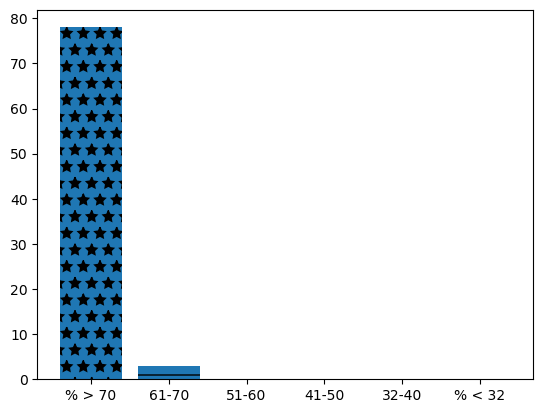

In [7]:
cgpi_list2 = [float(item) for item in selected_cgpi]

greaterThan70 = 0
between61_70 = 0
between51_60 = 0
between41_50 = 0
between32_40 = 0
below32 = 0

for i in cgpi_list2:
    if i > 7:
        greaterThan70+=1
    if i > 6.1 and i < 7:
        between61_70+=1
    if i > 5.1 and i < 6:
        between51_60+=1
    if i > 4.1 and i < 5:
        between41_50+=1
    if i > 3.2 and i < 4:
        between32_40+=1   
    if i < 3.2:
        below32+=1

labels = ['% > 70', '61-70', '51-60', '41-50', '32-40', '% < 32']  
values = [greaterThan70, between61_70, between51_60, between41_50, between32_40, below32]
bars = plt.bar(labels, values) 

patterns = ['*','-','/','*','-','/']
for i in bars:
    i.set_hatch(patterns.pop(0))
                
plt.show()                

### Faculty wise Results

In [8]:
ra = pd.read_csv(r"C:\Mini-Project\RA.csv")
start_index = 2  # Replace with your starting index
end_index = 83   # Replace with your ending index


# renaming the unammed columns 
ra = ra.rename(columns={'HMI' : 'HMI (Theory)'})
ra = ra.rename(columns={'Unnamed: 4': 'HMI (IA)'})
ra = ra.rename(columns={'DC': 'DC (Theory)'})
ra = ra.rename(columns={'Unnamed: 6': 'DC (IA)'})
ra = ra.rename(columns={'HPC/NLP': 'HPC/NLP (Theory)'}) 
ra = ra.rename(columns={'Unnamed: 8': 'HPC/NLP (IA)'})
ra = ra.rename(columns={'Institute Level -PM/EM': 'Institute Level -PM/EM (Theory)'}) 
ra = ra.rename(columns={'Unnamed: 10': 'Institute Level -PM/EM (IA)'})
ra = ra.rename(columns={'HMIL': 'HMIL (Termwork)'}) 
ra = ra.rename(columns={'Unnamed: 12': 'HMIL (Oral/Practical)'})
ra = ra.rename(columns={'DCL': 'DCL (Termwork)'}) 
ra = ra.rename(columns={'Unnamed: 14': 'DCL (Oral/Practical)'})
ra = ra.rename(columns={'CCL': 'CCL (Termwork)'}) 
ra = ra.rename(columns={'Unnamed: 16': 'CCL (Oral/Practical)'})
ra = ra.rename(columns={'Computational Lab-II': 'Computational Lab-II (Termwork)'}) 
ra = ra.rename(columns={'Unnamed: 18': 'Computational Lab-II (Oral/Practical)'})
ra = ra.rename(columns={'Major Project-II': 'Major Project-II (Termwork)'}) 
ra = ra.rename(columns={'Unnamed: 20': 'Major Project-II (Oral)'})


selected_HMI_TH = ra.loc[start_index:end_index, "HMI (Theory)"].tolist()
selected_HMI_T = [float(item) for item in selected_HMI_TH]
selected_HMI_IA = ra.loc[start_index:end_index, "HMI (IA)"].tolist()
selected_HMI_P = [float(item) for item in selected_HMI_IA]

selected_DC_TH = ra.loc[start_index:end_index, "DC (Theory)"].tolist()
selected_DC_T = [float(item) for item in selected_DC_TH]
selected_DC_IA = ra.loc[start_index:end_index, "DC (IA)"].tolist()
selected_DC_P = [float(item) for item in selected_DC_IA]

selected_HPC_NLP_TH = ra.loc[start_index:end_index, "HPC/NLP (Theory)"].tolist()
selected_HPC_NLP_T = [float(item) for item in selected_HPC_NLP_TH]
selected_HPC_NLP_IA = ra.loc[start_index:end_index, "HPC/NLP (IA)"].tolist()
selected_HPC_NLP_P = [float(item) for item in selected_HPC_NLP_IA]

selected_EM_TH = ra.loc[start_index:end_index, "Institute Level -PM/EM (Theory)"].tolist()
selected_EM_t = [item for item in selected_EM_TH if item != 'AB']
selected_EM_T = [float(item) for item in selected_EM_t]
selected_EM_IA = ra.loc[start_index:end_index, "Institute Level -PM/EM (IA)"].tolist()
selected_EM_P = [float(item) for item in selected_EM_IA]

selected_HMIL_TW = ra.loc[start_index:end_index, "HMIL (Termwork)"].tolist()
selected_HMIL_T = [float(item) for item in selected_HMIL_TW]
selected_HMIL_Prac = ra.loc[start_index:end_index, "HMIL (Oral/Practical)"].tolist()
selected_HMIL_P = [float(item) for item in selected_HMIL_Prac]

selected_DCL_TW = ra.loc[start_index:end_index, "DCL (Termwork)"].tolist()
selected_DCL_T = [float(item) for item in selected_DCL_TW]
selected_DCL_Prac = ra.loc[start_index:end_index, "DCL (Oral/Practical)"].tolist()
selected_DCL_P = [float(item) for item in selected_DCL_Prac]

selected_CCL_TW = ra.loc[start_index:end_index, "CCL (Termwork)"].tolist()
selected_CCL_T = [float(item) for item in selected_CCL_TW]
selected_CCL_Prac = ra.loc[start_index:end_index, "CCL (Oral/Practical)"].tolist()
selected_CCL_P = [float(item) for item in selected_CCL_Prac]

selected_LABII_TW = ra.loc[start_index:end_index, "Computational Lab-II (Termwork)"].tolist()
selected_LABII_T = [float(item) for item in selected_LABII_TW]
selected_LABII_Prac = ra.loc[start_index:end_index, "Computational Lab-II (Oral/Practical)"].tolist()
selected_LABII_P = [float(item) for item in selected_LABII_Prac]

selected_MPII_TW = ra.loc[start_index:end_index, "Major Project-II (Termwork)"].tolist()
selected_MPII_T = [float(item) for item in selected_MPII_TW]
selected_MPII_ORAL = ra.loc[start_index:end_index, "Major Project-II (Oral)"].tolist()
selected_MPII_P = [float(item) for item in selected_MPII_ORAL]

countHMI_TH = 0
for item in selected_HMI_T:
    countHMI_TH+=1
    
countHMI_IA = 0
for item in selected_HMI_P:
    countHMI_IA+=1    
    
countDC_TH = 0
for item in selected_DC_T:
    countDC_TH+=1
    
countDC_IA = 0
for item in selected_DC_P:
    countDC_IA+=1    
    
countHPC_NLP_TH = 0
for item in selected_HPC_NLP_T:
    countHPC_NLP_TH+=1
    
countHPC_NLP_IA = 0
for item in selected_HPC_NLP_P:
    countHPC_NLP_IA+=1    
    
countEM_TH = 0
for item in selected_EM_T:
    countEM_TH+=1
    
countEM_IA = 0
for item in selected_EM_P:
    countEM_IA+=1    
    
countHMIL_TW = 0
for item in selected_HMIL_T:
    countHMIL_TW+=1    
    
countHMIL_Prac = 0
for item in selected_HMIL_P:
    countHMIL_Prac+=1        
    
countDCL_TW = 0
for item in selected_DCL_T:
    countDCL_TW+=1 
    
countDCL_Prac = 0
for item in selected_DCL_P:
    countDCL_Prac+=1       
       
countCCL_TW = 0
for item in selected_CCL_T:
    countCCL_TW+=1
    
countCCL_Prac = 0
for item in selected_CCL_P:
    countCCL_Prac+=1    
    
countLABII_TW = 0
for item in selected_LABII_T:
    countLABII_TW+=1
    
countLABII_Prac = 0
for item in selected_LABII_P:
    countLABII_Prac+=1    
    
countMPII_TW = 0
for item in selected_MPII_T:
    countMPII_TW+=1
    
countMPII_ORAL = 0
for item in selected_MPII_P:
    countMPII_ORAL+=1        

passedHMI_TH = 0    
for item in selected_HMI_T:
    if  item > 32:
        passedHMI_TH+=1
        
passedHMI_IA = 0    
for item in selected_HMI_P:
    if  item > 8:
        passedHMI_IA+=1        
        
passedDC_TH = 0    
for item in selected_DC_T:
    if  item > 32:
        passedDC_TH+=1
        
passedDC_IA = 0    
for item in selected_DC_T:
    if  item > 8:
        passedDC_IA+=1        
        
passedHCP_NLP_TH = 0    
for item in selected_HPC_NLP_T:
    if  item > 32:
        passedHCP_NLP_TH+=1
        
passedHCP_NLP_IA = 0    
for item in selected_HPC_NLP_P:
    if  item > 8:
        passedHCP_NLP_IA+=1        
        
passedEM_TH = 0    
for item in selected_EM_T:
    if  item > 32:
        passedEM_TH+=1
        
passedEM_IA = 0    
for item in selected_EM_P:
    if  item > 8:
        passedEM_IA+=1        
        
passedHMIL_TW = 0    
for item in selected_HMIL_T:
    if  item > 10:
        passedHMIL_TW+=1       
        
passedHMIL_P = 0    
for item in selected_HMIL_P:
    if  item > 10:
        passedHMIL_P+=1         
        
passedDCL_TW = 0    
for item in selected_DCL_T:
    if  item > 10:
        passedDCL_TW+=1
        
passedDCL_P = 0    
for item in selected_DCL_P:
    if  item > 10:
        passedDCL_P+=1        
        
passedCCL_TW = 0    
for item in selected_CCL_T:
    if  item > 18:
        passedCCL_TW+=1
        
passedCCL_P = 0    
for item in selected_CCL_P:
    if  item > 10:
        passedCCL_P+=1        
        
passedLABII_TW = 0    
for item in selected_LABII_T:
    if  item > 18:
        passedLABII_TW+=1
        
passedLABII_P = 0    
for item in selected_LABII_P:
    if  item > 10:
        passedLABII_P+=1        
        
passedMPII_TW = 0    
for item in selected_MPII_T:
    if  item > 18:
        passedMPII_TW+=1    

passedMPII_ORAL = 0    
for item in selected_MPII_P:
    if  item > 18:
        passedMPII_ORAL+=1   

PassedPercentHMI_T = (passedHMI_TH/noOfStudents) *100     
PassedPercentHMI_P = (passedHMI_IA/noOfStudents) *100 
PassedPercentDC_T = (passedDC_TH/noOfStudents) *100
PassedPercentDC_P = (passedDC_IA/noOfStudents) *100
PassedPercentHCP_NLP_T = (passedHCP_NLP_TH/noOfStudents) *100
PassedPercentHCP_NLP_P = (passedHCP_NLP_IA/noOfStudents) *100
PassedPercentEM_T = (passedEM_TH/noOfStudents) *100
PassedPercentEM_P = (passedEM_IA/noOfStudents) *100
PassedPercentHMIL_T = (passedHMIL_TW/noOfStudents) *100
PassedPercentHMIL_P = (passedHMIL_P/noOfStudents) *100
PassedPercentDCL_T = (passedDCL_TW/noOfStudents) *100
PassedPercentDCL_P = (passedDCL_P/noOfStudents) *100
PassedPercentCCL_T = (passedCCL_TW/noOfStudents) *100
PassedPercentCCL_P = (passedCCL_P/noOfStudents) *100
PassedPercentLABII_T = (passedLABII_TW/noOfStudents) *100
PassedPercentLABII_P = (passedLABII_P/noOfStudents) *100
PassedPercentMPII_T = (passedMPII_TW/noOfStudents) *100
PassedPercentMPII_P = (passedMPII_ORAL/noOfStudents) *100
        
table = {'Name of Subject': ['HMI (Theory)', 'HMI (IA)', 'DC (Theory)', 'DC (IA)', 'HPC/NLP (Theory)', 'HPC/NLP (IA)', 'Institute Level -PM/EM (Theory)', 'Institute Level -PM/EM (IA)', 'HMIL (Termwork)', 'HMIL (Oral/Practical)', 'DCL Termwork', 'DCL (Oral/Practical)', 'CCL Termwork', 'CCL (Oral/Practical)', 'Computational Lab-II Termwork', 'Computational Lab-II (Oral/Practical)', 'Major Project-II Termwork', 'Major Project-II (Oral)'],
         'Sem': ['VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII', 'VIII'],
         'Total no. of students appeared': [countHMI_TH, countHMI_IA, countDC_TH, countDC_IA, countHPC_NLP_TH, countHPC_NLP_IA, countEM_TH, countEM_IA, countHMIL_TW, countHMIL_Prac, countDCL_TW, countDCL_Prac, countCCL_TW, countCCL_Prac, countLABII_TW, countLABII_Prac, countMPII_TW, countMPII_ORAL],
         'Passed': [passedHMI_TH, passedHMI_IA, passedDC_TH, passedDC_IA, passedHCP_NLP_TH, passedHCP_NLP_IA, passedEM_TH, passedEM_IA, passedHMIL_TW, passedHMIL_P, passedDCL_TW, passedDCL_P, passedCCL_TW, passedCCL_P, passedLABII_TW, passedLABII_P, passedMPII_TW, passedMPII_ORAL],
         '% of passing' : [PassedPercentHMI_T, PassedPercentHMI_P, PassedPercentDC_T, PassedPercentDC_P, PassedPercentHCP_NLP_T, PassedPercentHCP_NLP_P, PassedPercentEM_T, PassedPercentEM_P, PassedPercentHMIL_T, PassedPercentHMIL_P, PassedPercentDCL_T, PassedPercentDCL_P, PassedPercentCCL_T, PassedPercentCCL_P, PassedPercentLABII_T, PassedPercentLABII_P, PassedPercentMPII_T, PassedPercentMPII_P]}
res = pd.DataFrame(table)
res

,Name of Subject,Sem,Total no. of students appeared,Passed,% of passing
0,HMI (Theory),VIII,82,81,98.780488
1,HMI (IA),VIII,82,80,97.560976
2,DC (Theory),VIII,82,81,98.780488
3,DC (IA),VIII,82,82,100.000000
4,HPC/NLP (Theory),VIII,82,82,100.000000
5,HPC/NLP (IA),VIII,82,82,100.000000
6,Institute Level -PM/EM (Theory),VIII,81,81,98.780488
7,Institute Level -PM/EM (IA),VIII,82,81,98.780488
8,HMIL (Termwork),VIII,82,82,100.000000
9,HMIL (Oral/Practical),VIII,82,82,100.000000


### Marks Obtained

In [9]:
percentages_HMI_T = []
# Iterate over the marks of HMI_THEORY and calculate percentages
for i in selected_HMI_T:
    percentage_HMI_T = (i / 80.0) * 100.0
    percentages_HMI_T.append(percentage_HMI_T)

countG70HMI_T=0
count61_70HMI_T=0
count51_60HMI_T=0
count41_50HMI_T=0
count32_40HMI_T=0
countB32HMI_T=0
for i in percentages_HMI_T:
    if i > 70:
        countG70HMI_T+=1
    if i >= 61 and i <= 70:
        count61_70HMI_T+=1
    if i >= 51 and i <= 60:
        count51_60HMI_T+=1
    if i >= 41 and i <= 50:
        count41_50HMI_T+=1
    if i >= 32 and i <= 40:
        count32_40HMI_T+=1   
    if i < 32:
        countB32HMI_T+=1

        
percentages_HMI_P = []
# Iterate over the marks of HMI_THEORY and calculate percentages
for i in selected_HMI_P:
    percentage_HMI_P = (i / 20.0) * 100.0
    percentages_HMI_P.append(percentage_HMI_P)

countG70HMI_P=0
count61_70HMI_P=0
count51_60HMI_P=0
count41_50HMI_P=0
count32_40HMI_P=0
countB32HMI_P=0
for i in percentages_HMI_T:
    if i > 70:
        countG70HMI_P+=1
    if i >= 61 and i <= 70:
        count61_70HMI_P+=1
    if i >= 51 and i <= 60:
        count51_60HMI_P+=1
    if i >= 41 and i <= 50:
        count41_50HMI_P+=1
    if i >= 32 and i <= 40:
        count32_40HMI_P+=1   
    if i < 32:
        countB32HMI_P+=1   
        
        
percentages_DC_T = []
# Iterate over the marks of DC_THEORY and calculate percentages
for i in selected_DC_T:
    percentage_DC_T = (i / 80.0) * 100.0
    percentages_DC_T.append(percentage_DC_T)

countG70DC_T=0
count61_70DC_T=0
count51_60DC_T=0
count41_50DC_T=0
count32_40DC_T=0
countB32DC_T=0
for i in percentages_DC_T:
    if i > 70:
        countG70DC_T+=1
    if i >= 61 and i <= 70:
        count61_70DC_T+=1
    if i >= 51 and i <= 60:
        count51_60DC_T+=1
    if i >= 41 and i <= 50:
        count41_50DC_T+=1
    if i >= 32 and i <= 40:
        count32_40DC_T+=1   
    if i < 32:
        countB32DC_T+=1
        
        
percentages_DC_P = []
# Iterate over the marks of DC_PRACTICAL and calculate percentages
for i in selected_DC_P:
    percentage_DC_P = (i / 20.0) * 100.0
    percentages_DC_P.append(percentage_DC_P)

countG70DC_P=0
count61_70DC_P=0
count51_60DC_P=0
count41_50DC_P=0
count32_40DC_P=0
countB32DC_P=0
for i in percentages_DC_P:
    if i > 70:
        countG70DC_P+=1
    if i >= 61 and i <= 70:
        count61_70DC_P+=1
    if i >= 51 and i <= 60:
        count51_60DC_P+=1
    if i >= 41 and i <= 50:
        count41_50DC_P+=1
    if i >= 32 and i <= 40:
        count32_40DC_P+=1   
    if i < 32:
        countB32DC_P+=1
        

percentages_HCP_NLP_T = []  
# Iterate over the marks of HCP_NLP_THEORY and calculate percentages
for i in selected_HPC_NLP_T:
    percentage_HCP_NLP_T = (i / 80.0) * 100.0
    percentages_HCP_NLP_T.append(percentage_HCP_NLP_T)

countG70HCP_NLP_T=0
count61_70HCP_NLP_T=0
count51_60HCP_NLP_T=0
count41_50HCP_NLP_T=0
count32_40HCP_NLP_T=0
countB32HCP_NLP_T=0
for i in percentages_HCP_NLP_T:
    if i > 70:
        countG70HCP_NLP_T+=1
    if i >= 61 and i <= 70:
        count61_70HCP_NLP_T+=1
    if i >= 51 and i <= 60:
        count51_60HCP_NLP_T+=1
    if i >= 41 and i <= 50:
        count41_50HCP_NLP_T+=1
    if i >= 32 and i <= 40:
        count32_40HCP_NLP_T+=1   
    if i < 32:
        countB32HCP_NLP_T+=1
        
        
percentages_HCP_NLP_P = []
# Iterate over the marks of HCP_NLP_PRACTICAL and calculate percentages
for i in selected_HPC_NLP_P:
    percentage_HCP_NLP_P = (i / 20.0) * 100.0
    percentages_HCP_NLP_P.append(percentage_HCP_NLP_P)

countG70HCP_NLP_P=0
count61_70HCP_NLP_P=0
count51_60HCP_NLP_P=0
count41_50HCP_NLP_P=0
count32_40HCP_NLP_P=0
countB32HCP_NLP_P=0
for i in percentages_HCP_NLP_P:
    if i > 70:
        countG70HCP_NLP_P+=1
    if i >= 61 and i <= 70:
        count61_70HCP_NLP_P+=1
    if i >= 51 and i <= 60:
        count51_60HCP_NLP_P+=1
    if i >= 41 and i <= 50:
        count41_50HCP_NLP_P+=1
    if i >= 32 and i <= 40:
        count32_40HCP_NLP_P+=1   
    if i < 32:
        countB32HCP_NLP_P+=1
        
percentages_EM_T = []   
# Iterate over the marks of Institute Level -PM/EM Theory and calculate percentages
for i in selected_EM_T:
    percentage_EM_T = (i / 80) * 100
    percentages_EM_T.append(percentage_EM_T)

countG70EM_T=0
count61_70EM_T=0
count51_60EM_T=0
count41_50EM_T=0
count32_40EM_T=0
countB32EM_T=0
for i in percentages_EM_T:
    if i > 70:
        countG70EM_T+=1
    if i >= 61 and i <= 70:
        count61_70EM_T+=1
    if i >= 51 and i <= 60:
        count51_60EM_T+=1
    if i >= 41 and i <= 50:
        count41_50EM_T+=1
    if i >= 32 and i <= 40:
        count32_40EM_T+=1   
    if i < 32:
        countB32EM_T+=1
        
        
percentages_EM_P = []   
# Iterate over the marks of Institute Level -PM/EM PRACTICAL and calculate percentages
for i in selected_EM_P:
    percentage_EM_P = (i / 20.0) * 100.0
    percentages_EM_P.append(percentage_EM_P)

countG70EM_P=0
count61_70EM_P=0
count51_60EM_P=0
count41_50EM_P=0
count32_40EM_P=0
countB32EM_P=0
for i in percentages_EM_T:
    if i > 70:
        countG70EM_P+=1
    if i >= 61 and i <= 70:
        count61_70EM_P+=1
    if i >= 51 and i <= 60:
        count51_60EM_P+=1
    if i >= 41 and i <= 50:
        count41_50EM_P+=1
    if i >= 32 and i <= 40:
        count32_40EM_P+=1   
    if i < 32:
        countB32EM_P+=1  
        
        
percentages_HMIL_T = []
# Iterate over the marks of HMIL (Termwork) and calculate percentages
for i in selected_HMIL_T:
    percentage_HMIL_T = (i / 25.0) * 100.0
    percentages_HMIL_T.append(percentage_HMIL_T)

countG70HMIL_T=0
count61_70HMIL_T=0
count51_60HMIL_T=0
count41_50HMIL_T=0
count32_40HMIL_T=0
countB32HMIL_T=0
for i in percentages_EM_T:
    if i > 70:
        countG70HMIL_T+=1
    if i >= 61 and i <= 70:
        count61_70HMIL_T+=1
    if i >= 51 and i <= 60:
        count51_60HMIL_T+=1
    if i >= 41 and i <= 50:
        count41_50HMIL_T+=1
    if i >= 32 and i <= 40:
        count32_40HMIL_T+=1   
    if i < 32:
        countB32HMIL_T+=1
        
        
percentages_HMIL_P = []     
# Iterate over the marks of HMIL (Oral/Practical) and calculate percentages
for i in selected_HMIL_P:
    percentage_HMIL_P = (i / 25.0) * 100.0
    percentages_HMIL_P.append(percentage_HMIL_P)

countG70HMIL_P=0
count61_70HMIL_P=0
count51_60HMIL_P=0
count41_50HMIL_P=0
count32_40HMIL_P=0
countB32HMIL_P=0
for i in percentages_HMIL_P:
    if i > 70:
        countG70HMIL_P+=1
    if i >= 61 and i <= 70:
        count61_70HMIL_P+=1
    if i >= 51 and i <= 60:
        count51_60HMIL_P+=1
    if i >= 41 and i <= 50:
        count41_50HMIL_P+=1
    if i >= 32 and i <= 40:
        count32_40HMIL_P+=1   
    if i < 32:
        countB32HMIL_P+=1
        
        
percentages_DCL_T = []  
# Iterate over the marks of DCL (Termwork) and calculate percentages
for i in selected_DCL_T:
    percentage_DCL_T = (i / 25.0) * 100.0
    percentages_DCL_T.append(percentage_DCL_T)

countG70DCL_T=0
count61_70DCL_T=0
count51_60DCL_T=0
count41_50DCL_T=0
count32_40DCL_T=0
countB32DCL_T=0
for i in percentages_DCL_T:
    if i > 70:
        countG70DCL_T+=1
    if i >= 61 and i <= 70:
        count61_70DCL_T+=1
    if i >= 51 and i <= 60:
        count51_60DCL_T+=1
    if i >= 41 and i <= 50:
        count41_50DCL_T+=1
    if i >= 32 and i <= 40:
        count32_40DCL_T+=1   
    if i < 32:
        countB32DCL_T+=1
        
percentages_DCL_P = []        
# Iterate over the marks of DCL (Oral/Practical) and calculate percentages
for i in selected_DCL_P:
    percentage_DCL_P = (i / 25.0) * 100.0
    percentages_DCL_P.append(percentage_DCL_P)

countG70DCL_P=0
count61_70DCL_P=0
count51_60DCL_P=0
count41_50DCL_P=0
count32_40DCL_P=0
countB32DCL_P=0
for i in percentages_DCL_P:
    if i > 70:
        countG70DCL_P+=1
    if i >= 61 and i <= 70:
        count61_70DCL_P+=1
    if i >= 51 and i <= 60:
        count51_60DCL_P+=1
    if i >= 41 and i <= 50:
        count41_50DCL_P+=1
    if i >= 32 and i <= 40:
        count32_40DCL_P+=1   
    if i < 32:
        countB32DCL_P+=1

percentages_CCL_T = []  
# Iterate over the marks of CCL (Termwork) and calculate percentages
for i in selected_CCL_T:
    percentage_CCL_T = (i / 50.0) * 100.0
    percentages_CCL_T.append(percentage_CCL_T)

countG70CCL_T=0
count61_70CCL_T=0
count51_60CCL_T=0
count41_50CCL_T=0
count32_40CCL_T=0
countB32CCL_T=0
for i in percentages_CCL_T:
    if i > 70:
        countG70CCL_T+=1
    if i >= 61 and i <= 70:
        count61_70CCL_T+=1
    if i >= 51 and i <= 60:
        count51_60CCL_T+=1
    if i >= 41 and i <= 50:
        count41_50CCL_T+=1
    if i >= 32 and i <= 40:
        count32_40CCL_T+=1   
    if i < 32:
        countB32CCL_T+=1
        
percentages_CCL_P = []        
# Iterate over the marks of CCL (Oral/Practical) and calculate percentages
for i in selected_CCL_P:
    percentage_CCL_P = (i / 25.0) * 100.0
    percentages_CCL_P.append(percentage_CCL_P)

countG70CCL_P=0
count61_70CCL_P=0
count51_60CCL_P=0
count41_50CCL_P=0
count32_40CCL_P=0
countB32CCL_P=0
for i in percentages_CCL_P:
    if i > 70:
        countG70CCL_P+=1
    if i >= 61 and i <= 70:
        count61_70CCL_P+=1
    if i >= 51 and i <= 60:
        count51_60CCL_P+=1
    if i >= 41 and i <= 50:
        count41_50CCL_P+=1
    if i >= 32 and i <= 40:
        count32_40CCL_P+=1   
    if i < 32:
        countB32CCL_P+=1
        
        
percentages_LABII_T = []  
# Iterate over the marks of Computational Lab-II (Termwork) and calculate percentages
for i in selected_LABII_T:
    percentage_LABII_T = (i / 50.0) * 100.0
    percentages_LABII_T.append(percentage_LABII_T)

countG70LABII_T=0
count61_70LABII_T=0
count51_60LABII_T=0
count41_50LABII_T=0
count32_40LABII_T=0
countB32LABII_T=0
for i in percentages_LABII_T:
    if i > 70:
        countG70LABII_T+=1
    if i >= 61 and i <= 70:
        count61_70LABII_T+=1
    if i >= 51 and i <= 60:
        count51_60LABII_T+=1
    if i >= 41 and i <= 50:
        count41_50LABII_T+=1
    if i >= 32 and i <= 40:
        count32_40LABII_T+=1   
    if i < 32:
        countB32LABII_T+=1
        
percentages_LABII_P = []        
# Iterate over the marks of Computational Lab-II (Oral/Practical) and calculate percentages
for i in selected_LABII_P:
    percentage_LABII_P = (i / 25.0) * 100.0
    percentages_LABII_P.append(percentage_LABII_P)

countG70LABII_P=0
count61_70LABII_P=0
count51_60LABII_P=0
count41_50LABII_P=0
count32_40LABII_P=0
countB32LABII_P=0
for i in percentages_LABII_P:
    if i > 70:
        countG70LABII_P+=1
    if i >= 61 and i <= 70:
        count61_70LABII_P+=1
    if i >= 51 and i <= 60:
        count51_60LABII_P+=1
    if i >= 41 and i <= 50:
        count41_50LABII_P+=1
    if i >= 32 and i <= 40:
        count32_40LABII_P+=1   
    if i < 32:
        countB32LABII_P+=1 
        
        
percentages_MPII_T = []
# Iterate over the marks of Major Project-II (Termwork) and calculate percentages
for i in selected_MPII_T:
    percentage_MPII_T = (i / 50.0) * 100.0
    percentages_MPII_T.append(percentage_MPII_T)

countG70MPII_T=0
count61_70MPII_T=0
count51_60MPII_T=0
count41_50MPII_T=0
count32_40MPII_T=0
countB32MPII_T=0
for i in percentages_MPII_T:
    if i > 70:
        countG70MPII_T+=1
    if i >= 61 and i <= 70:
        count61_70MPII_T+=1
    if i >= 51 and i <= 60:
        count51_60MPII_T+=1
    if i >= 41 and i <= 50:
        count41_50MPII_T+=1
    if i >= 32 and i <= 40:
        count32_40MPII_T+=1   
    if i < 32:
        countB32MPII_T+=1
        
percentages_MPII_P = []        
# Iterate over the marks of Major Project-II (Oral) and calculate percentages
for i in selected_MPII_P:
    percentage_MPII_P = (i / 50.0) * 100.0
    percentages_MPII_P.append(percentage_MPII_P)

countG70MPII_P=0
count61_70MPII_P=0
count51_60MPII_P=0
count41_50MPII_P=0
count32_40MPII_P=0
countB32MPII_P=0
for i in percentages_MPII_P:
    if i > 70:
        countG70MPII_P+=1
    if i >= 61 and i <= 70:
        count61_70MPII_P+=1
    if i >= 51 and i <= 60:
        count51_60MPII_P+=1
    if i >= 41 and i <= 50:
        count41_50MPII_P+=1
    if i >= 32 and i <= 40:
        count32_40MPII_P+=1   
    if i < 32:
        countB32MPII_P+=1 

        
Table = {'Name of Subject' : ['HMI (Theory)', 'HMI (IA)', 'DC (Theory)', 'DC (IA)', 'HPC/NLP (Theory)', 'HPC/NLP (IA)', 'Institute Level -PM/EM (Theory)', 'Institute Level -PM/EM (IA)', 'HMIL (Termwork)', 'HMIL (Oral/Practical)', 'DCL (Termwork)', 'DCL (Oral/Practical)', 'CCL (Termwork)', 'CCL (Oral/Practical)', 'Computational Lab-II (Termwork)', 'Computational Lab-II (Oral/Practical)', 'Major Project-II (Termwork)', 'Major Project-II (Oral)'],
         'Above 70%' : [countG70HMI_T, countG70HMI_P, countG70DC_T, countG70DC_P, countG70HCP_NLP_T, countG70HCP_NLP_P, countG70EM_T, countG70EM_P, countG70HMIL_T, countG70HMIL_P, countG70DCL_T, countG70DCL_P, countG70CCL_P, countG70CCL_P, countG70LABII_T, countG70LABII_P, countG70MPII_T, countG70MPII_P],
         'Percent between 61% - 70%' : [count61_70HMI_T, count61_70HMI_P, count61_70DC_T, count61_70DC_P, count61_70HCP_NLP_T, count61_70HCP_NLP_P, count61_70EM_T, count61_70EM_P, count61_70HMIL_T, count61_70HMIL_P, count61_70DCL_T, count61_70DCL_P, count61_70CCL_T, count61_70CCL_P, count61_70LABII_T, count61_70LABII_P, count61_70MPII_T, count61_70MPII_P],
         'Percent between 51% - 60%' : [count51_60HMI_T, count51_60HMI_P, count51_60DC_T, count51_60DC_P, count51_60HCP_NLP_T, count51_60HCP_NLP_P, count51_60EM_T, count51_60EM_P, count51_60HMIL_T, count51_60HMIL_P, count51_60DCL_T, count51_60DCL_P, count51_60CCL_T, count51_60CCL_P, count51_60LABII_T, count51_60LABII_P, count51_60MPII_T, count51_60MPII_P],
         'Percent between 41% - 50%' : [count41_50HMI_T, count41_50HMI_P, count41_50DC_T, count41_50DC_P, count41_50HCP_NLP_T, count41_50HCP_NLP_P, count41_50EM_T, count41_50EM_P, count41_50HMIL_T, count41_50HMIL_P, count41_50DCL_T, count41_50DCL_P, count41_50CCL_T, count41_50CCL_P, count41_50LABII_T, count41_50LABII_P, count41_50MPII_T, count41_50MPII_P], 
         'Percent between 32% - 40%' : [count32_40HMI_T, count32_40HMI_P, count32_40HMI_T, count32_40HMI_P, count32_40HCP_NLP_T, count32_40HCP_NLP_P, count32_40EM_T, count32_40EM_P, count32_40HMIL_T, count32_40HMIL_P, count32_40DCL_T, count32_40DCL_P, count32_40CCL_T, count32_40CCL_P, count32_40LABII_T, count32_40LABII_P, count32_40MPII_T, count32_40MPII_P],
         'Percent below 32%' : [countB32HMI_T, countB32HMI_P, countB32DC_T, countB32DC_P, countB32HCP_NLP_T, countB32HCP_NLP_P, countB32EM_T, countB32EM_P, countB32HMIL_T, countB32HMIL_P, countB32DCL_T, countB32DCL_P, countB32CCL_T, countB32CCL_P, countB32LABII_T, countB32LABII_P, countB32MPII_T, countB32MPII_P]}     

result = pd.DataFrame(Table)
result

,Name of Subject,Above 70%,Percent between 61% - 70%,Percent between 51% - 60%,Percent between 41% - 50%,Percent between 32% - 40%,Percent below 32%
0,HMI (Theory),40,30,10,1,1,0
1,HMI (IA),40,30,10,1,1,0
2,DC (Theory),37,25,13,6,1,0
3,DC (IA),61,14,3,3,1,0
4,HPC/NLP (Theory),57,16,3,6,0,0
5,HPC/NLP (IA),51,16,11,4,0,0
6,Institute Level -PM/EM (Theory),28,25,22,6,0,0
7,Institute Level -PM/EM (IA),28,25,22,6,0,0
8,HMIL (Termwork),28,25,22,6,0,0
9,HMIL (Oral/Practical),82,0,0,0,0,0
